In [5]:
import random
import numpy as np
import pandas as pd
#from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
#import sklearn.ensemble as ske
#import tensorflow as tf
#from tensorflow.contrib import skflow

from pyspark import SparkContext
sc = SparkContext()

In [6]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [7]:
from pyspark.sql.functions import explode

In [8]:
from pyspark.sql import *

In [9]:
from pyspark.sql.functions import col, asc

IMPORTANDO DADOS DO NAVIO TITANIC

In [10]:
df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', sep=";", inferschema='true', encoding = 'ISO-8859-1').load('C:\Projeto_Titanic/titanic.csv')

In [52]:
df.show(10)

+------+--------+--------------------+------+------+-----+-----+--------+--------+-------+--------+----+----+--------------------+
|pclass|survived|                name|   sex|   age|sibsp|parch|  ticket|    fare|  cabin|embarked|boat|body|           home.dest|
+------+--------+--------------------+------+------+-----+-----+--------+--------+-------+--------+----+----+--------------------+
|     1|       1|Allen, Miss. Elis...|female|    29|    0|    0|   24160|211,3375|     B5|       S|   2|null|        St Louis, MO|
|     1|       1|Allison, Master. ...|  male|0,9167|    1|    2|  113781|151,5500|C22 C26|       S|  11|null|Montreal, PQ / Ch...|
|     1|       0|Allison, Miss. He...|female|     2|    1|    2|  113781|151,5500|C22 C26|       S|null|null|Montreal, PQ / Ch...|
|     1|       0|Allison, Mr. Huds...|  male|    30|    1|    2|  113781|151,5500|C22 C26|       S|null| 135|Montreal, PQ / Ch...|
|     1|       0|Allison, Mrs. Hud...|female|    25|    1|    2|  113781|151,5500|C

QUANTIDADE DE PESSOAS A BORDO - 1309 <br >
MÉDIA DE SOBREVIVENCIA - 38%

In [11]:
df.describe('survived').show()

+-------+-------------------+
|summary|           survived|
+-------+-------------------+
|  count|               1309|
|   mean| 0.3819709702062643|
| stddev|0.48605517086648325|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



QUANTIDADE DE SOBREVIVENTES NO NAVIO TITANIC

In [14]:
df_survived = df.filter(col("survived")==1)
df_survived.count()

500

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

MÉDIA DE SOBREVIVÊNCIA DO NAVIO TITANIC POR TIPO DE CLASSE 
PRIMEIRA CLASSE - 62%
 SEGUNDA CLASSE - 43%
TERCEIRA CLASSE - 25%

In [16]:
df.groupby(col("pclass")).mean().show()

+------+-----------+------------------+-------------------+-------------------+------------------+
|pclass|avg(pclass)|     avg(survived)|         avg(sibsp)|         avg(parch)|         avg(body)|
+------+-----------+------------------+-------------------+-------------------+------------------+
|  null|       null|              null|               null|               null|              null|
|     1|        1.0|0.6191950464396285|0.43653250773993807| 0.3653250773993808|162.82857142857142|
|     3|        3.0|0.2552891396332863| 0.5684062059238364| 0.4005641748942172| 155.8181818181818|
|     2|        2.0|0.4296028880866426| 0.3935018050541516|0.36823104693140796|167.38709677419354|
+------+-----------+------------------+-------------------+-------------------+------------------+



MÉDIA DE SOBREVIVÊNCIA DO NAVIO TITANIC POR TIPO DE CLASSE E SEXO
PRIMEIRA CLASSE - MULHERES - 96%
PRIMEIRA CLASSE - HOMENS   - 34%
 SEGUNDA CLASSE - MULHERES - 88%
 SEGUNDA CLASSE - HOMENS   - 14%
TERCEIRA CLASSE - MULHERES - 49%
TERCEIRA CLASSE - HOMENS   - 15%

In [25]:
df_agrupamento_classe_sexo = df.groupBy(["pclass","sex"]).mean()
#df_agrupamento_classe_sexo.orderBy("pclass").show()

+------+------+-----------+-------------------+-------------------+-------------------+------------------+
|pclass|   sex|avg(pclass)|      avg(survived)|         avg(sibsp)|         avg(parch)|         avg(body)|
+------+------+-----------+-------------------+-------------------+-------------------+------------------+
|  null|  null|       null|               null|               null|               null|              null|
|     1|female|        1.0| 0.9652777777777778| 0.5555555555555556| 0.4722222222222222|              null|
|     1|  male|        1.0| 0.3407821229050279| 0.3407821229050279|0.27932960893854747|162.82857142857142|
|     2|female|        2.0| 0.8867924528301887|                0.5| 0.6509433962264151|              52.0|
|     2|  male|        2.0|0.14619883040935672|0.32748538011695905|0.19298245614035087|171.23333333333332|
|     3|  male|        3.0|0.15212981744421908|0.47058823529411764|0.25557809330628806|151.85416666666666|
|     3|female|        3.0|0.49074074

In [29]:
df_pandas= df_agrupamento_classe_sexo.toPandas()

In [33]:
df_pandas

,pclass,sex,avg(pclass),avg(survived),avg(sibsp),avg(parch),avg(body)
0,NaN,None,NaN,NaN,NaN,NaN,NaN
1,2.0,female,2.0,0.886792,0.500000,0.650943,52.000000
2,3.0,male,3.0,0.152130,0.470588,0.255578,151.854167
3,1.0,male,1.0,0.340782,0.340782,0.279330,162.828571
4,3.0,female,3.0,0.490741,0.791667,0.731481,183.000000
5,1.0,female,1.0,0.965278,0.555556,0.472222,NaN
6,2.0,male,2.0,0.146199,0.327485,0.192982,171.233333


<AxesSubplot:>

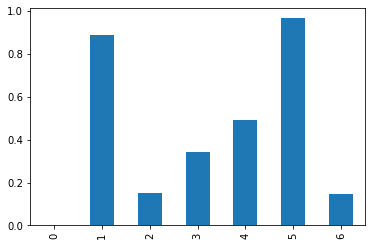

In [47]:
df_pandas['avg(survived)'].plot.bar()

In [48]:
df_pandas.count()

pclass           6
sex              6
avg(pclass)      6
avg(survived)    6
avg(sibsp)       6
avg(parch)       6
avg(body)        5
dtype: int64